In [22]:
#Syntax to download data through terminal: rsync -aP kkulbay@student-shell.sys.kth.se:/afs/kth.se/misc/csc/dept/tmh/corpora/tidigits/disc_4.2.1/tidigits/test/ ~/Desktop/KTH/DT2119_Speech_and_Speaker_Recognition/dt2119/DT2119_Speech/LAB3/tidigits/test

import numpy as np
import lab3_toolsSPYDER as tools
import lab3_proto as proto
import lab1_proto as proto1
import lab1_tools as tools1
import lab2_proto as proto2
import lab2_tools as tools2
import matplotlib.pyplot as plt

# 4.1 Target Class Definition

In [23]:
phoneHMMs = np.load('lab2_models_all.npz',allow_pickle=True)['phoneHMMs'].item()
phones = sorted(phoneHMMs.keys())
nstates = {phone: phoneHMMs[phone]['means'].shape[0] for phone in phones}
# stateList = [ph + '_' + str(id) for ph in phones for id in range(nstates[ph])]

# np.save("stateList.npy",stateList)

#loading genereated list from above 
stateList = np.load("stateList.npy", allow_pickle=True)

# 4.2 Forced Alignment

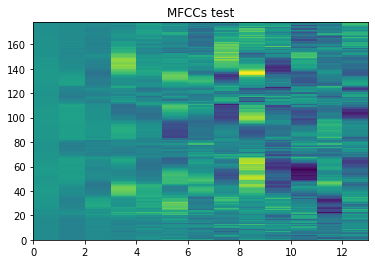

['sil_0', 'sil_1', 'sil_2', 'z_0', 'z_1', 'z_2', 'iy_0', 'iy_1', 'iy_2', 'r_0', 'r_1', 'r_2', 'ow_0', 'ow_1', 'ow_2', 'sp_0', 'f_0', 'f_1', 'f_2', 'ao_0', 'ao_1', 'ao_2', 'r_0', 'r_1', 'r_2', 'sp_0', 'th_0', 'th_1', 'th_2', 'r_0', 'r_1', 'r_2', 'iy_0', 'iy_1', 'iy_2', 'sp_0', 'sil_0', 'sil_1', 'sil_2']
dict_keys(['startprob', 'transmat', 'means', 'covars', 'name'])


['sil',
 'z',
 'iy',
 'r',
 'ow',
 'sp',
 'f',
 'ao',
 'r',
 'sp',
 'th',
 'r',
 'iy',
 'sp',
 'sil']

In [24]:

#lmfccEXAMPLE = np.load("lmfccEXAMPLE.npy", allow_pickle=True)

filename = 'tidigits/train/man/nw/z43a.wav'
samples, samplingrate = tools.loadAudio(filename)

lmfccEXAMPLE = proto1.mfcc(samples)


plt.pcolormesh(lmfccEXAMPLE)
plt.title("MFCCs test")
plt.show()

wordTrans = list(tools.path2info(filename)[2])
assert wordTrans == ['z', '4', '3']
#-------
prondict = {} 
prondict['o'] = ['ow']
prondict['z'] = ['z', 'iy', 'r', 'ow']
prondict['1'] = ['w', 'ah', 'n']
prondict['2'] = ['t', 'uw']
prondict['3'] = ['th', 'r', 'iy']
prondict['4'] = ['f', 'ao', 'r']
prondict['5'] = ['f', 'ay', 'v']
prondict['6'] = ['s', 'ih', 'k', 's']
prondict['7'] = ['s', 'eh', 'v', 'ah', 'n']
prondict['8'] = ['ey', 't']
prondict['9'] = ['n', 'ay', 'n']

phoneTrans = proto.words2phones(wordTrans, prondict)
assert phoneTrans == ['sil', 'z', 'iy', 'r', 'ow', 'sp', 'f', 'ao', 'r', 'sp', 'th', 'r', 'iy', 'sp', 'sil']
#---------
utteranceHMM = proto2.concatHMMs(phoneHMMs, phoneTrans)
stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans
                  for stateid in range(nstates[phone])]
print(stateTrans)
print(utteranceHMM.keys())
utteranceHMM["name"]




/var/folders/q9/fn0bq0g17g1_dkmkvbvcxll00000gn/T/ipykernel_18356/799215553.py:2: RuntimeWarning: divide by zero encountered in log
  vloglik, vpath = proto2.viterbi(obsloglik,np.log(utteranceHMM["startprob"]),np.log(utteranceHMM["transmat"][:-1,:-1]))


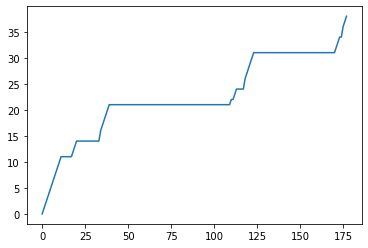

In [25]:
obsloglik = tools2.log_multivariate_normal_density_diag(lmfccEXAMPLE,utteranceHMM["means"],utteranceHMM["covars"])
vloglik, vpath = proto2.viterbi(obsloglik,np.log(utteranceHMM["startprob"]),np.log(utteranceHMM["transmat"][:-1,:-1]))
